In [1]:
## Set the portion of reads subsampled out
read_portion = 0.85

## Set the path
inputpath = f'../DATA/sims_{read_portion}_results.csv.gz'

In [2]:
## Load in mods for statistical analysis 
import pandas as pd, numpy as np, scipy.stats as ss

## Load in mutual information 
from sklearn.metrics import normalized_mutual_info_score as nmi

In [3]:
## Load in mods for plotting 
## Bring in matplot lib 
from matplotlib import pyplot as plt

## load in image
from matplotlib import image

## Load in path and path path 
from matplotlib.path import Path
from matplotlib.patches import PathPatch

## Load in seaborn
import seaborn as sns

In [4]:
## Bring in our mods from our librarys
from bootlegger import *

## Bring in our ftns for epi genome viz
from epigenomevisulization import sortglob

## Set the seed
np.random.seed(711)

In [5]:
## Load in data
alldata = pd.read_csv(inputpath)

## Print the shape
print(alldata.shape)

## Parse the read portion
data = alldata[(alldata.ReadPortion==read_portion)]

## View the head
data.head()

(7200, 20)


,VaryingPeaks,ReadPortion,PeakSize,WindowSize,Seed,ExpName,TopDown,TopDownNz,Pearson,PearsonNz,Rsquared,RsquaredNz,Spearman,SpearmanNz,Kendallt,KendalltNz,Kendallw,KendallwNz,NormMutualInfo,NormMutualInfoNz
15,0.01,0.85,0,10000,100,2501_001,0.996141,0.996126,0.997064,0.995859,0.994136,0.991736,0.998554,0.995765,0.998457,0.995675,0.999277,0.997882,0.991743,0.981577
16,0.01,0.85,0,10000,101,2501_001,0.994910,0.994891,0.996785,0.995467,0.993580,0.990954,0.998043,0.994264,0.997925,0.994179,0.999021,0.997132,0.990242,0.978214
17,0.01,0.85,0,10000,102,2501_001,0.995414,0.995397,0.997344,0.996256,0.994694,0.992525,0.998197,0.994717,0.998089,0.994641,0.999098,0.997359,0.991179,0.980311
18,0.01,0.85,0,10000,103,2501_001,0.994870,0.994850,0.996854,0.995565,0.993718,0.991150,0.998009,0.994163,0.997889,0.994078,0.999004,0.997082,0.990483,0.978754
19,0.01,0.85,0,10000,104,2501_001,0.995028,0.995009,0.995605,0.993801,0.991229,0.987641,0.998173,0.994648,0.998058,0.994553,0.999087,0.997324,0.990488,0.978767


In [6]:
## Gather the names of each statistic
stats = data.columns[6:].tolist()

## Gather the varying peaks 
varying_peaks = data.VaryingPeaks.unique()

## Gather the mean aacross varying peaks for each stat
mdata = data.groupby('VaryingPeaks').mean().reset_index().sort_values('VaryingPeaks')
mdata.head()

,VaryingPeaks,ReadPortion,PeakSize,WindowSize,Seed,TopDown,TopDownNz,Pearson,PearsonNz,Rsquared,RsquaredNz,Spearman,SpearmanNz,Kendallt,KendalltNz,Kendallw,KendallwNz,NormMutualInfo,NormMutualInfoNz
0,0.01,0.85,0.0,10000.0,159.5,0.994986,0.994970,0.997222,0.995324,0.994452,0.990670,0.998302,0.994464,0.998210,0.994409,0.999151,0.997232,0.992100,0.980576
1,0.05,0.85,0.0,10000.0,159.5,0.974939,0.974860,0.986434,0.977139,0.973057,0.954807,0.991532,0.972146,0.991078,0.971885,0.995766,0.986072,0.968350,0.921664
2,0.10,0.85,0.0,10000.0,159.5,0.949144,0.948983,0.972655,0.953884,0.946077,0.909912,0.982997,0.943545,0.982093,0.943046,0.991499,0.971772,0.943598,0.859510
3,0.15,0.85,0.0,10000.0,159.5,0.922923,0.922681,0.958010,0.929015,0.917827,0.863097,0.974657,0.914959,0.973314,0.914238,0.987328,0.957478,0.921944,0.804156
4,0.20,0.85,0.0,10000.0,159.5,0.895362,0.895035,0.942962,0.903274,0.889253,0.815949,0.966006,0.884814,0.964217,0.883889,0.983003,0.942405,0.901477,0.751115


In [7]:
## Set alpha level
alpha_lvl = 5

## Initilze lists
upper_ci,lower_ci = [], []

## Iterate thru the peaks
for vp in varying_peaks:
    ## splice on varying peaks 
    tmp = data[(data.VaryingPeaks==vp)]
    
    ## Append percental for each stat
    upper_ci.append([vp] + [np.percentile(tmp[s].values,100-alpha_lvl) for s in stats])
    lower_ci.append([vp] + [np.percentile(tmp[s].values,alpha_lvl) for s in stats])
        
## Make into a dataframe 
upper_ci = pd.DataFrame(upper_ci,columns=['VaryingPeaks'] + stats).sort_values('VaryingPeaks')
lower_ci = pd.DataFrame(lower_ci,columns=['VaryingPeaks'] + stats).sort_values('VaryingPeaks')

## View the head of upper ci
upper_ci.head()

,VaryingPeaks,TopDown,TopDownNz,Pearson,PearsonNz,Rsquared,RsquaredNz,Spearman,SpearmanNz,Kendallt,KendalltNz,Kendallw,KendallwNz,NormMutualInfo,NormMutualInfoNz
0,0.01,0.995995,0.995984,0.998233,0.996799,0.996470,0.993609,0.998772,0.995377,0.998714,0.995346,0.999386,0.997688,0.994285,0.984091
1,0.05,0.977740,0.977656,0.989904,0.981117,0.979911,0.962590,0.993227,0.975360,0.992886,0.974990,0.996613,0.987680,0.974778,0.929257
3,0.10,0.954768,0.954598,0.979350,0.960132,0.959126,0.921854,0.986065,0.948795,0.985436,0.948079,0.993033,0.974397,0.954453,0.869892
2,0.15,0.931028,0.930771,0.968052,0.938106,0.937124,0.880044,0.979156,0.921604,0.978134,0.920853,0.989577,0.960801,0.936217,0.816068
5,0.20,0.905962,0.905615,0.956152,0.915173,0.914226,0.837542,0.972042,0.893655,0.970679,0.892338,0.986021,0.946827,0.919876,0.763276


In [8]:
## Set the shared peaks portion vector 
shared_peaks = 1 - upper_ci.VaryingPeaks.values

## Set the unique stats
uniq_stats = sorted(list(set([s.split('Nz')[0] for s in stats])))

## List the stat names in our order, write their associated print names
order_stats = ['TopDown',   'Pearson',   'Rsquared',   'Spearman',    'Kendallt',  'Kendallw',     'NormMutualInfo']
stats_names = ['Top-Down', 'Pearson $R$', '$R^2$',  'Spearman '+ '\u03C1', 'Kendall ' + '\u03C4', 'Kendall $W$', 'Normalized\nMutual\nInformation' ]

## Make into a dictonary and print 
stat_dict = dict(zip(order_stats,stats_names))
stat_dict

{'TopDown': 'Top-Down',
 'Pearson': 'Pearson $R$',
 'Rsquared': '$R^2$',
 'Spearman': 'Spearman ρ',
 'Kendallt': 'Kendall τ',
 'Kendallw': 'Kendall $W$',
 'NormMutualInfo': 'Normalized\nMutual\nInformation'}

In [9]:
## Set dataframes of synthetic replicates
synthetic_reps = [pd.read_csv(p) for p in sortglob('../DATA/MISC/SYNTHETIC/rep_*.gz')]

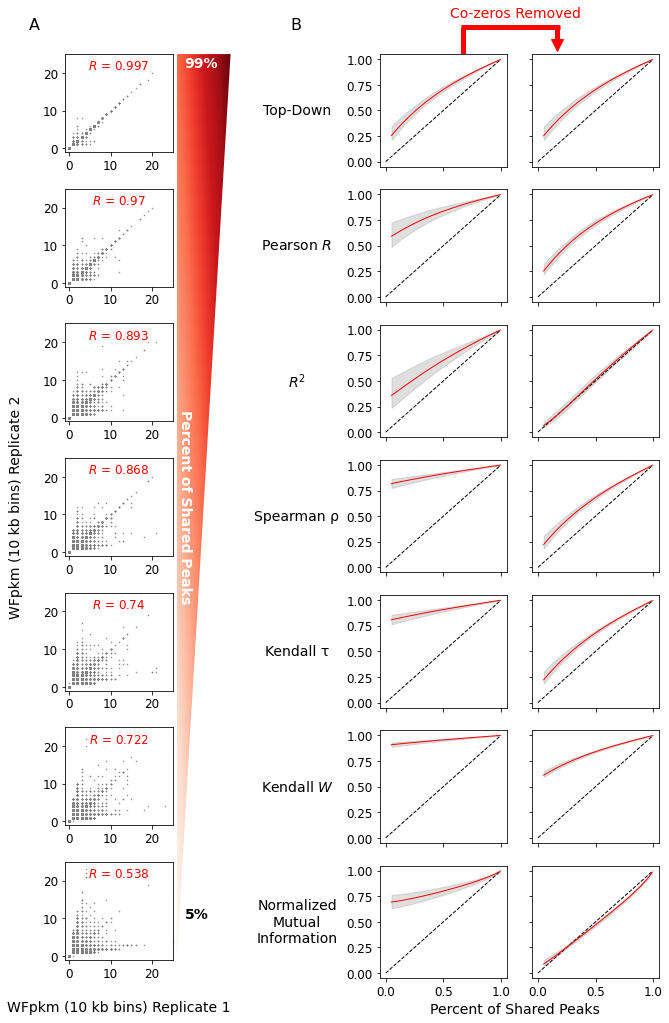

In [10]:
## Call a figure and set the facecolor
fig,ax = plt.subplots(len(order_stats),2,figsize=(5,17),sharex=True,sharey=True)
fig.set_facecolor('w')

## Iterate thruthe ordered stats and co-zero status
for i, sname in enumerate(order_stats):
    for j, se in enumerate(['','Nz']):
        
        ## Set the axis
        plt.sca(ax[i,j])
        
        ## Draw a one-to-one line
        plt.plot([0,1],[0,1],color='k',linestyle='--',linewidth=1)
        
        ## Fill in the 95% CI
        plt.fill_between(x=shared_peaks,y1=upper_ci[sname+se],y2=lower_ci[sname+se],alpha=0.25,color='grey')
            
        ## Annotate the stat name 
        #plt.ylabel(stat_dict[sname] +'\n' if (j == 0) else None,fontsize=14,rotation=0)
        if j == 0:
            plt.text(-0.77,0.5,stat_dict[sname],fontsize=14,va='center',ha='center')
        
        ## Plot the mean 
        plt.plot(shared_peaks,mdata[sname+se],color='r',linewidth=1)
        
        ## modify the x and y ticks 
        plt.xticks(fontsize=12);plt.yticks(fontsize=12)
        
xloc = -0.75
for i,k in enumerate(synthetic_reps[::-1]):
    
    yloc = 0.8 - (i*0.11)
    
    syn_ax = fig.add_axes([xloc,yloc,0.3,0.08])
    
    plt.sca(syn_ax)
    
    ## Calculat the portion of shared peaks and get values to plot
    shared_peaks_p, plot_values = np.round(1 - float(k.columns[3].split('_')[0]),2), k[k.columns[3:]].T.values
            
    ## Plot the WFpkm
    plt.plot(*plot_values,'.',ms=1,color='grey');  
    
    r,pval = np.round(ss.pearsonr(*plot_values),3)
    
    plt.xlim(-1,25);plt.ylim(-1,25)
    
    plt.xticks(fontsize=12);plt.yticks(fontsize=12)
    
    plt.title('$R$ = %s'%r,fontsize=12,y=0.78,color='r')
    
    if i == 6: ## Add x label
        plt.xlabel('\nWFpkm (10 kb bins) Replicate 1',fontsize=14)
        
    if i == 3:
        plt.ylabel('WFpkm (10 kb bins) Replicate 2\n',fontsize=14)
    
## Set the axis     
plt.sca(ax[0,-1])

## Load in the red triangle
tri_ax = fig.add_axes([xloc+0.31,yloc,0.15,0.74],autoscale_on=False)

path = Path([[0,1],[1,1],[0,0],[0,1]])
patch = PathPatch(path, facecolor='none',linewidth=0.01)

tri_ax.add_patch(patch) 

Z, Z2 = np.meshgrid(np.linspace(0,1), np.linspace(0,1))

im = plt.imshow(Z-Z2, interpolation='antialiased', cmap=plt.cm.Reds, origin='upper', 
                extent=[0, 1, 0, 1], clip_path=patch, clip_on=True, aspect='auto')

im.set_clip_path(patch)
tri_ax.axis('off')

## Add text to triangle
## Add 99 % label
plt.text(0.15,0.99,s='99%',color='w',va='center',ha='left',fontsize=14,fontweight='bold')

## Add 5 % label 
plt.text(0.15,0.05,s='5%',color='k',va='center',ha='left',fontsize=14,fontweight='bold')

## Annotate the triangle with label 
plt.text(0.15,0.5,s='Percent of Shared Peaks',color='w',rotation=-90,va='center',ha='center',fontsize=14,fontweight='bold')

## Add a and b labels 
[fig.text(x,0.9,l,fontsize=16) for x,l in zip((-0.125,-0.85),('B','A'))]

## label to bottom of subplots
fig.text(0.5,0.1,s='Percent of Shared Peaks',va='center',ha='center',fontsize=14)

## add a red circle axis
cir_ax = fig.add_axes([0.35,0.88,0.3,0.025])

#xs = np.linspace(-0.5,np.pi,1000)
#plt.plot(xs,np.sin(xs),'r',linewidth=5)
#plt.plot(np.pi-0.15,-0.1,'rv',ms=20)
#plt.ylim(-0.3,1.1)

## Plot horizontal line and vertical bars
plt.hlines(0,-1.05,1.05,color='r',linewidth=5)
plt.vlines(1,-0.5,0,color='r',linewidth=5)
plt.vlines(-1,-1,0,color='r',linewidth=5)

## Add pointer
plt.plot(1,-0.45,'v',color='r',ms=12)

## Set x and y limists 
plt.xlim(-1.05,1.25)
plt.ylim(-0.7,0.1)

## Add title 
plt.title('Co-zeros Removed',fontsize=14,color='r')

## Turn off axis 
plt.axis('off')

## set the path for saving the figure 
figsave = '../FIGURES/Figure.3.png' if (read_portion == 0.85) else None #'../FIGURES/Statistical_porfiles_%s_Figure.3B.png'%read_portion
        
## Save the figure
if figsave:
    plt.savefig(figsave,dpi=1200,bbox_inches='tight');

In [11]:
## Set the coutn of simulation per experiment / lims code 
sim_per_exp = data.groupby(['ExpName','VaryingPeaks']).count().ReadPortion.min()

## Set the number of reps in each varying peak 
nreps = data.groupby('VaryingPeaks').count().ReadPortion.min()

## Gather the names of expeirments / lims codes 
expnames = data.ExpName.unique()

## Format string to print 
print_str = 'Number of simulations per LIMS: %s\nNumber of replicates per peak portion: %s\nNumber of LIMS: %s'

## Print the numbers above
print(print_str%(sim_per_exp,nreps,len(expnames)))

## Set the colors for plotting 
colors = ['r','b','g','m','orange','brown','lightblue','grey']

## Zip into a dictionary 
color_dict = dict(zip(expnames,colors))

Number of simulations per LIMS: 15
Number of replicates per peak portion: 120
Number of LIMS: 8


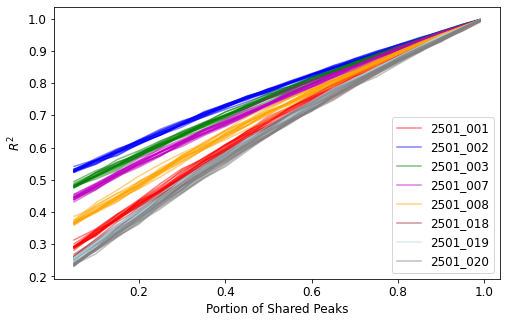

In [12]:
## Call a figure, set facecolor
fig,ax = plt.subplots(1,1,figsize=(8,5))
fig.set_facecolor('w')

## Set a statistic name and initlize list of seeds
stat, seeded = 'Rsquared', []

## Iterate thru its seeds
for s,d in data.groupby('Seed'):
    
    ## Set a tmp df
    tmp = d.sort_values('VaryingPeaks')
    
    ## set the eperiment name
    expn = tmp.ExpName.min()
    
    ## Set the label based on if this is the first time plotting this experiment 
    if expn in seeded:
        label = None
    else:
        label = expn
        seeded.append(expn)
    
    ## Set color
    color = color_dict[expn]
    
    ## Plot all the seeds 
    plt.plot(1-tmp.VaryingPeaks,tmp[stat].values,alpha=0.5,color=color,label=label)

## Add a legend
plt.legend(fontsize=12);

## increase x and y tick size
plt.xticks(fontsize=12);plt.yticks(fontsize=12)

## Add labels to the x and y- axis 
plt.xlabel('Portion of Shared Peaks',fontsize=12);
plt.ylabel(stat_dict[stat],fontsize=12);

In [13]:
## Set the new dfs list
newdfs = []

## Iterate thru seeds 
for s,d in data.groupby('Seed'):
    
    ## Set a tmp dataframe with varying peaks and stats names 
    tmp = d.sort_values('VaryingPeaks')[['VaryingPeaks']+stats]
    
    ## Set index and drop peaks
    tmp.index = tmp.VaryingPeaks
    tmp.drop('VaryingPeaks',axis=1,inplace=True)
    
    ## Transpose and reset index 
    tmp = tmp.T
    tmp.reset_index(inplace=True)
    
    ## Set the stat and drop index 
    tmp['Stat'] = tmp['index']
    tmp.drop('index',axis=1,inplace=True)
    
    ## Append the tmp 
    newdfs.append(tmp)
    
## Concat the data frames 
cor_x_vp = pd.concat(newdfs)

## Remove large vriables
del newdfs, tmp

## Check our work
assert cor_x_vp.shape[0] == data.Seed.unique().shape[0] * len(stats)

## Calc the AUC
cor_x_vp['AUC'] = cor_x_vp[varying_peaks].T.sum()*0.05

## Print the shape
cor_x_vp.shape

(1680, 22)

In [14]:
## Initilize an AUC df 
auc = pd.DataFrame(np.zeros((nreps,len(stats))),columns=stats)

## Iterate thru stats
for s in stats:
    auc[s] = cor_x_vp[(cor_x_vp.Stat==s)]['AUC'].values
    
## Show the head 
auc.head()

,TopDown,TopDownNz,Pearson,PearsonNz,Rsquared,RsquaredNz,Spearman,SpearmanNz,Kendallt,KendalltNz,Kendallw,KendallwNz,NormMutualInfo,NormMutualInfoNz
0,0.721730,0.720788,0.816716,0.735430,0.685298,0.580139,0.910121,0.696182,0.905277,0.694192,0.955060,0.848088,0.801708,0.516466
1,0.722319,0.721377,0.808838,0.723124,0.673374,0.564444,0.910825,0.699342,0.906006,0.697320,0.955412,0.849668,0.802151,0.518172
2,0.721519,0.720576,0.809762,0.724347,0.674830,0.566108,0.910295,0.696887,0.905453,0.694885,0.955147,0.848442,0.801718,0.516645
3,0.721324,0.720380,0.813853,0.730956,0.681432,0.575558,0.910114,0.696426,0.905261,0.694410,0.955057,0.848211,0.801135,0.515307
4,0.723878,0.722940,0.806004,0.718727,0.667975,0.556216,0.911208,0.700992,0.906401,0.698955,0.955604,0.850494,0.802606,0.519648


In [15]:
## Convert to a long dataframe, Initilize
auc_long = []

## Iterate thru the stats
for s in stats:
    
    ## Set co zero
    co = 'Removed' if s[-2:] == 'Nz' else 'Retained'
    
    ## Make a copy
    tmp = auc[[s]].copy()
    
    ## Set AUC, statistic name, and co zero stats 
    tmp['AUC']    = tmp[s]
    tmp['Statistic']   = s.split('Nz')[0]
    tmp['Co-zeros'] = co
    
    ## Drop the statistic column 
    tmp.drop(s,axis=1,inplace=True)
    
    ## Append temp
    auc_long.append(tmp)

## Concat
auc_long = pd.concat(auc_long)

## Make the AUC a float
auc_long['AUC'] = auc_long.AUC.apply(float)

## Show auc
auc_long.head()

,AUC,Statistic,Co-zeros
0,0.721730,TopDown,Retained
1,0.722319,TopDown,Retained
2,0.721519,TopDown,Retained
3,0.721324,TopDown,Retained
4,0.723878,TopDown,Retained


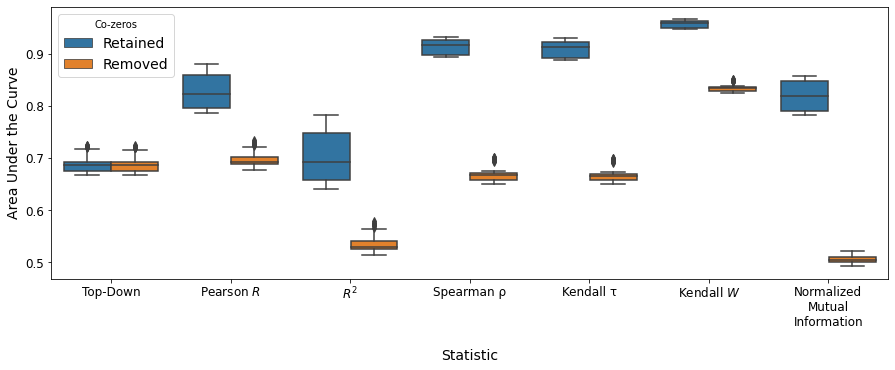

In [16]:
## Set the figure and facecolor
fig,ax = plt.subplots(1,1,figsize=(15,5))
fig.set_facecolor('w')

## Plot the boxplots
sns.boxplot(x='Statistic',y='AUC',hue='Co-zeros',data=auc_long);

## set y and x labels 
plt.ylabel('Area Under the Curve', fontsize=14);
plt.xlabel('\nStatistic', fontsize=14);

## modify legend
plt.legend(fontsize=14,title='Co-zeros');

## Reset xticks and yticks
xtick_labels = [stat_dict[a.get_text()] for a in ax.get_xticklabels()]

## Gather xticks positonis and lables 
p,l = plt.xticks()

## Set the xticks 
plt.xticks(p,xtick_labels,fontsize=12)

## increase fontsize of yticks 
plt.yticks(fontsize=12)

## Set the savepath
figsave = '../FIGURES/S.Figure.1.png' if (read_portion == 0.85) else None #'../FIGURES/Area_Under_the_Curve_%s_S.Figure.1.png'%read_portion

## Save out figure
plt.savefig(figsave,dpi=300,bbox_inches='tight');

In [17]:
## Set the null and alt hypothesis 
ho = 'We cannot reject null hypothesis of equal means.'
h1 = 'We reject null hypothesis of equal means.'

## Write a ftn for hypothesis testing and plotting 
def hypothesis_test(df,xname,yname,xlabel='Aread Under the Curve',ylabel='Counts',ax=None):
    
    ## Gather y and x 
    y, x = df[yname], df[xname]
    
    ## Calculate the observed difference of means 
    obs_diff   = np.abs(difference_of_means(x,y))
    
    ## Boot strap some null differences 
    boots_diff = np.abs(test_null(x, y, difference_of_means))
    
    ## Calculate the p-value 
    pvalue     = calculate_pvalue(boots_diff,obs_diff)
    
    ## Print results 
    print('\n%s vs. %s\np-value: %s\n%s'%(yname,xname,pvalue,(h1 if pvalue<0.05 else ho)))
    
    ## Calcualte and print the means and 95% ci 
    my,ly,uy   = calculate_ci(bootstrap(y,np.mean))
    mx,lx,ux   = calculate_ci(bootstrap(x,np.mean))
    
    ## Call a figure
    if ax is None:
        fig,ax = plt.subplots(1,2,figsize=(8,3))
        
    ## Plot the differences in means
    plt.sca(ax[1])
    
    ## Plot hitogram
    plt.hist(boots_diff,label='Null Distribution',color='grey',alpha=0.5);
    plt.vlines(obs_diff,0,len(boots_diff)/5,color='r',label='Observed Difference')
    
    ## add x and y axis label
    plt.xlabel('Difference of Means',fontsize=12)
    
    ## Add legend
    plt.legend()
   
    ## Plot histograme of x and y
    plt.sca(ax[0])
    
    ## Plot hist of x and y 
    plt.hist(x,alpha=0.5,label=xname)
    plt.hist(y,alpha=0.5,label=yname)

    ## Set x and y axis labels 
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)

    ## Set legend
    plt.legend();
    
    ## Return the CI
    return (mx,lx,ux),(my,ly,uy), pvalue


Kendallt vs. KendalltNz
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.9096; CI = [0.9074,0.912]
Mean = 0.6673; CI = [0.6654,0.6691]

Kendallw vs. KendallwNz
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.957; CI = [0.9559,0.9581]
Mean = 0.8343; CI = [0.8333,0.8353]

NormMutualInfo vs. NormMutualInfoNz
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.8197; CI = [0.8153,0.8241]
Mean = 0.5055; CI = [0.5045,0.5065]

Pearson vs. PearsonNz
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.8284; CI = [0.8237,0.8335]
Mean = 0.6965; CI = [0.6946,0.6984]

Rsquared vs. RsquaredNz
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.7026; CI = [0.6951,0.7102]
Mean = 0.5346; CI = [0.5324,0.5368]

Spearman vs. SpearmanNz
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.914; CI = [0.9118,0.9162]
Mean = 0.6686; CI = [0.6665,0.6705]

TopDown vs. TopDownNz
p-value: 0.635
We cannot reject null hypothesis of equal m

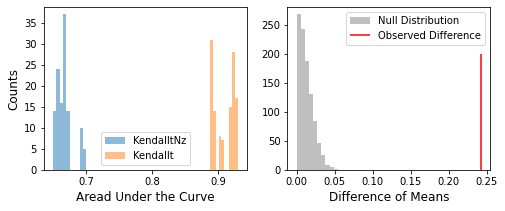

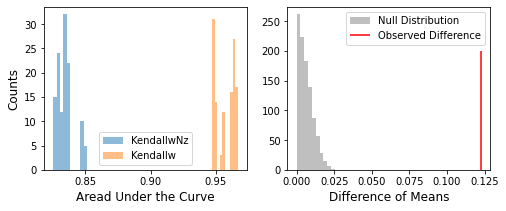

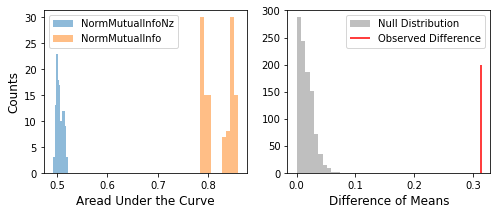

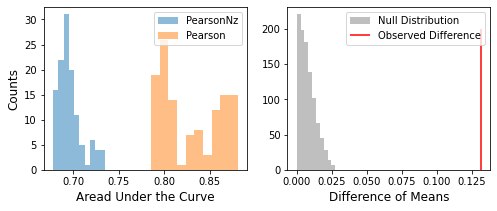

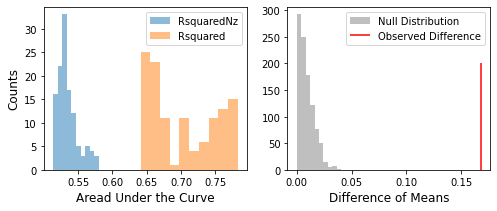

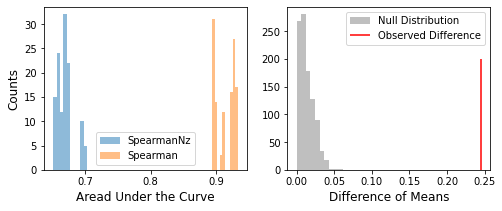

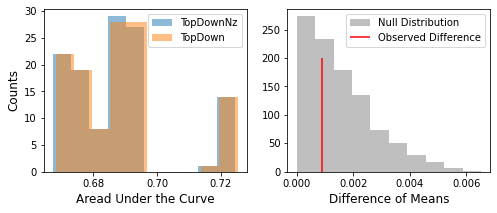

In [18]:
## Test of co-zero effect on AUC
## Initilze list 
ci_stats = [] 

## Set the list of columns 
collist  = ['Statistic','Mean1','L1','R1','Mean2','L2','R2','P-value']

## Iterate thru the uniq statistic names 
for s in uniq_stats:
    ## Call our hypothesis test ftn 
    X,Y,pval = hypothesis_test(auc,s+'Nz',s)
    
    ## append to ci stats list
    ci_stats.append([s,*Y,*X,pval])


Spearman vs. Kendallt
p-value: 0.037
We reject null hypothesis of equal means.
Mean = 0.914; CI = [0.9119,0.9161]
Mean = 0.9097; CI = [0.9075,0.9122]


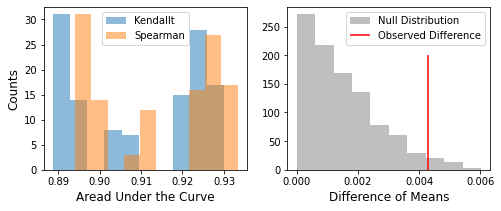

In [19]:
## Test of Kendall T vs Spearman P
yname,xname = 'Spearman','Kendallt'

## Call test ftn 
hypothesis_test(auc,xname,yname);


Kendallt vs. Pearson
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.9098; CI = [0.9074,0.9121]
Mean = 0.8284; CI = [0.8235,0.8333]


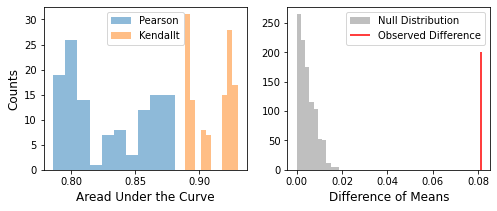

In [20]:
## Test of Top down vs Pearson
xname,yname = 'Pearson', 'Kendallt'

## Call test ftn 
hypothesis_test(auc,xname,yname);


Pearson vs. TopDown
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.8283; CI = [0.8232,0.8331]
Mean = 0.6882; CI = [0.686,0.6905]


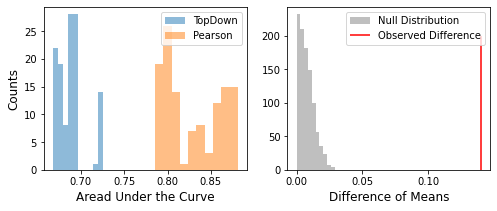

In [21]:
## Test of Top down vs Pearson
xname,yname = 'TopDown','Pearson'

## Call test ftn 
hypothesis_test(auc,xname,yname);


SpearmanNz vs. KendalltNz
p-value: 0.387
We cannot reject null hypothesis of equal means.
Mean = 0.6685; CI = [0.6668,0.6704]
Mean = 0.6672; CI = [0.6654,0.6691]


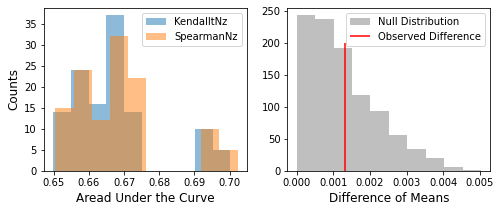

In [22]:
## Test of Kendall T vs Spearman P (co-zero removed)
yname,xname = 'SpearmanNz','KendalltNz'

## Call test ftn 
hypothesis_test(auc,xname,yname);


RsquaredNz vs. NormMutualInfoNz
p-value: 0.0
We reject null hypothesis of equal means.
Mean = 0.5346; CI = [0.5324,0.5368]
Mean = 0.5056; CI = [0.5046,0.5067]


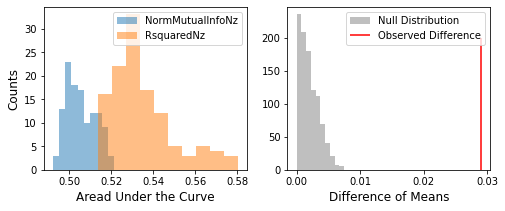

In [23]:
## Test of R2 vs Norm. Mutual. Info. (co-zero removed)
yname,xname = 'RsquaredNz','NormMutualInfoNz'

## Call test ftn 
hypothesis_test(auc,xname,yname);

In [24]:
## Make ci stats list into a dataframe
tosave = pd.DataFrame(ci_stats)

## Remake columns and index
tosave.columns = collist 
tosave.index = tosave.Statistic

## reorder index
tosave = tosave.loc[order_stats]

## Set the save path
savepath = '../DATA/MISC/stats.p_values.cozeros.%s.tsv'%read_portion

## Save out the dataframe 
tosave.to_csv(savepath, sep=' ',index=False)

## Print the dataframe
tosave

,Statistic,Mean1,L1,R1,Mean2,L2,R2,P-value
Statistic,,,,,,,,
TopDown,TopDown,0.6881,0.6860,0.6906,0.6872,0.6850,0.6895,0.635
Pearson,Pearson,0.8284,0.8237,0.8335,0.6965,0.6946,0.6984,0.000
Rsquared,Rsquared,0.7026,0.6951,0.7102,0.5346,0.5324,0.5368,0.000
Spearman,Spearman,0.9140,0.9118,0.9162,0.6686,0.6665,0.6705,0.000
Kendallt,Kendallt,0.9096,0.9074,0.9120,0.6673,0.6654,0.6691,0.000
Kendallw,Kendallw,0.9570,0.9559,0.9581,0.8343,0.8333,0.8353,0.000
NormMutualInfo,NormMutualInfo,0.8197,0.8153,0.8241,0.5055,0.5045,0.5065,0.000
